In [29]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from fbprophet import Prophet
from plotly import graph_objs as go
from plotly.offline import init_notebook_mode, iplot, plot
from IPython.display import display, IFrame
from scipy import stats

In [4]:
df_catch = pd.read_csv('/home/savin/Documents/DEV/dataset_fish/Датасет/with_same_ship_ids_between_db/db1/catch.csv')

In [5]:
df_catch.head()

,id_ves,date,id_region,id_fish,catch_volume,id_regime,permit,id_own
0,1628,2022-01-01,272,400,31.874,41,2824,961
1,70,2022-01-01,277,886,0.476,1,2414,1281
2,1608,2022-01-01,116,409,26.310,15,3031,1227
3,832,2022-01-01,272,292,9.541,1,1894,1281
4,832,2022-01-01,272,113,0.062,1,1894,1281


In [7]:
id_own = pd.Series(df_catch['id_own']).unique()
rate_own = pd.DataFrame()
for el in id_own:
    aggr_df = df_catch.loc[df_catch['id_own']==el].groupby("date")[["catch_volume"]].sum()
    aggr_df.columns = [f"{el}"]
    rate_own = pd.concat([rate_own, aggr_df], axis=1)
rate_own.head()

,961,1281,1227,1011,1219,942,984,951,1164,1091,...,1044,1259,996,1280,1045,1399,1129,1004,954,1101
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,31.874,77.870,26.31,230.705,336.914,59.087,12.196,94.889,61.787,79.956,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-02,169.866,93.250,NaN,593.726,NaN,105.141,NaN,268.387,47.167,224.484,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-03,577.346,89.951,34.56,628.579,NaN,142.241,NaN,245.295,120.646,162.778,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-04,663.930,75.758,NaN,259.477,NaN,86.626,NaN,147.306,328.844,204.438,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-01-05,345.875,47.301,NaN,482.655,NaN,136.666,NaN,177.678,152.780,86.839,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [34]:
df = rate_own['961'].dropna().reset_index()
df.columns = ["ds", "y"]
prediction_size = 30
train_df = df[:-prediction_size]
m = Prophet()
m.fit(train_df)
future = m.make_future_dataframe(periods=prediction_size)
forecast = m.predict(future)
forecast.tail(n=3)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/savin/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Initial log joint probability = -45.6551
Iteration  1. Log joint probability =    47.7614. Improved by 93.4165.
Iteration  2. Log joint probability =    91.6002. Improved by 43.8388.
Iteration  3. Log joint probability =    102.261. Improved by 10.6611.
Iteration  4. Log joint probability =     102.39. Improved by 0.128519.
Iteration  5. Log joint probability =    102.393. Improved by 0.00324468.
Iteration  6. Log joint probability =    102.474. Improved by 0.0810317.
Iteration  7. Log joint probability =    102.475. Improved by 0.000901555.
Iteration  8. Log joint probability =    102.479. Improved by 0.00407291.
Iteration  9. Log joint probability =     102.48. Improved by 0.000974171.
Iteration 10. Log joint probability =    102.506. Improved by 0.0255007.
Iteration 11. Log joint probability =    102.511. Improved by 0.0051864.
Iteration 12. Log joint probability =     102.52. Improved by 0.00935493.
Iteration 13. Log joint probability =    102.523. Improved by 0.00268734.
Iteratio

/home/savin/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/savin/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
106,2022-04-18,759.759158,420.404248,1079.271478,759.759133,759.759184,-11.183199,-11.183199,-11.183199,-11.183199,-11.183199,-11.183199,0.0,0.0,0.0,748.575959
107,2022-04-19,761.710330,389.738536,1039.140231,761.710304,761.710357,-44.355094,-44.355094,-44.355094,-44.355094,-44.355094,-44.355094,0.0,0.0,0.0,717.355236
108,2022-04-20,763.661502,477.733153,1155.248301,763.661475,763.661531,52.224503,52.224503,52.224503,52.224503,52.224503,52.224503,0.0,0.0,0.0,815.886005


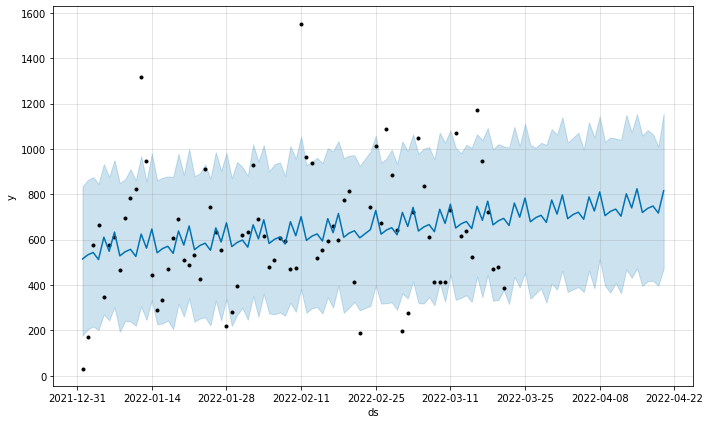

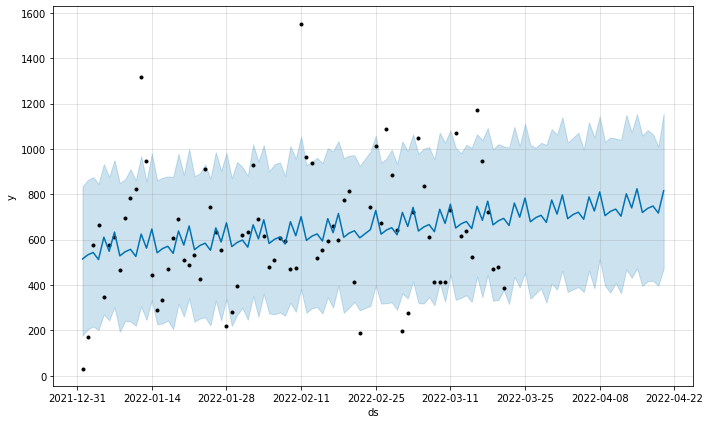

In [19]:
m.plot(forecast)

In [54]:
def make_comparison_dataframe(historical, forecast):
    """Join the history with the forecast.

       The resulting dataset will contain columns 'yhat', 'yhat_lower', 'yhat_upper' and 'y'.
    """
    return forecast.set_index("ds")[["yhat", "yhat_lower", "yhat_upper"]].join(
        historical.set_index("ds"),
    )

In [55]:
cmp_df = make_comparison_dataframe(df, forecast)
cmp_df.tail(n=3)

,yhat,yhat_lower,yhat_upper,y
ds,,,,
2022-04-18 00:00:00,748.575959,420.404248,1079.271478,NaN
2022-04-19 00:00:00,717.355236,389.738536,1039.140231,NaN
2022-04-20 00:00:00,815.886005,477.733153,1155.248301,NaN


In [22]:
def calculate_forecast_errors(df, prediction_size):
    """Calculate MAPE and MAE of the forecast.

       Args:
           df: joined dataset with 'y' and 'yhat' columns.
           prediction_size: number of days at the end to predict.
    """

    # Make a copy
    df = df.copy()

    # Now we calculate the values of e_i and p_i according to the formulas given in the article above.
    df["e"] = df["y"] - df["yhat"]
    df["p"] = 100 * df["e"] / df["y"]

    # Recall that we held out the values of the last `prediction_size` days
    # in order to predict them and measure the quality of the model.

    # Now cut out the part of the data which we made our prediction for.
    predicted_part = df[-prediction_size:]

    # Define the function that averages absolute error values over the predicted part.
    error_mean = lambda error_name: np.mean(np.abs(predicted_part[error_name]))

    # Now we can calculate MAPE and MAE and return the resulting dictionary of errors.
    return {"MAPE": error_mean("p"), "MAE": error_mean("e")}

In [23]:
for err_name, err_value in calculate_forecast_errors(cmp_df, prediction_size).items():
    print(err_name, err_value)

MAPE nan
MAE nan


In [25]:
def show_forecast(cmp_df, num_predictions, num_values, title, width=800, height=500):
    """Visualize the forecast."""

    def create_go(name, column, num, **kwargs):
        points = cmp_df.tail(num)
        args = dict(name=name, x=points.index, y=points[column], mode="lines")
        args.update(kwargs)
        return go.Scatter(**args)

    lower_bound = create_go(
        "Lower Bound",
        "yhat_lower",
        num_predictions,
        line=dict(width=0),
        marker=dict(color="gray"),
    )
    upper_bound = create_go(
        "Upper Bound",
        "yhat_upper",
        num_predictions,
        line=dict(width=0),
        marker=dict(color="gray"),
        fillcolor="rgba(68, 68, 68, 0.3)",
        fill="tonexty",
    )
    forecast = create_go(
        "Forecast", "yhat", num_predictions, line=dict(color="rgb(31, 119, 180)")
    )
    actual = create_go("Actual", "y", num_values, marker=dict(color="red"))

    # In this case the order of the series is important because of the filling
    data = [lower_bound, upper_bound, forecast, actual]

    layout = go.Layout(yaxis=dict(title="Posts"), title=title, showlegend=False)
    fig = go.Figure(data=data, layout=layout)

    # in a Jupyter Notebook, the following should work
    #iplot(fig, show_link=False)

    # in a Jupyter Book, we save a plot offline and then render it with IFrame
    plot_path = f"/home/savin/Documents/DEV/dataset_fish/Датасет/with_same_ship_ids_between_db/{title}.html".replace(" ", "_")
    plot(fig, filename=plot_path, show_link=False, auto_open=False);
    display(IFrame(plot_path, width=width, height=height))


show_forecast(cmp_df, prediction_size, 100, "New posts on Medium")

In [26]:
def inverse_boxcox(y, lambda_):
    return np.exp(y) if lambda_ == 0 else np.exp(np.log(lambda_ * y + 1) / lambda_)

In [30]:
train_df2 = train_df.copy().set_index("ds")
train_df2["y"], lambda_prophet = stats.boxcox(train_df2["y"])
train_df2.reset_index(inplace=True)
m2 = Prophet()
m2.fit(train_df2)
future2 = m2.make_future_dataframe(periods=prediction_size)
forecast2 = m2.predict(future2)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/savin/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.




Initial log joint probability = -46.3408
Iteration  1. Log joint probability =    53.6648. Improved by 100.006.
Iteration  2. Log joint probability =    95.9164. Improved by 42.2516.
Iteration  3. Log joint probability =    106.701. Improved by 10.7844.
Iteration  4. Log joint probability =    108.179. Improved by 1.47819.
Iteration  5. Log joint probability =    108.775. Improved by 0.596107.
Iteration  6. Log joint probability =    109.332. Improved by 0.557017.
Iteration  7. Log joint probability =    109.413. Improved by 0.0813447.
Iteration  8. Log joint probability =    109.467. Improved by 0.0537379.
Iteration  9. Log joint probability =    109.495. Improved by 0.0278621.
Iteration 10. Log joint probability =    109.513. Improved by 0.0184165.
Iteration 11. Log joint probability =     109.52. Improved by 0.00676251.
Iteration 12. Log joint probability =    109.526. Improved by 0.00583012.
Iteration 13. Log joint probability =    109.531. Improved by 0.00481372.
Iteration 14. Lo

/home/savin/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/home/savin/.local/lib/python3.8/site-packages/fbprophet/forecaster.py:891: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [31]:
for column in ["yhat", "yhat_lower", "yhat_upper"]:
    forecast2[column] = inverse_boxcox(forecast2[column], lambda_prophet)

In [32]:
cmp_df2 = make_comparison_dataframe(df, forecast2)
for err_name, err_value in calculate_forecast_errors(cmp_df2, prediction_size).items():
    print(err_name, err_value)

MAPE nan
MAE nan


In [33]:
show_forecast(cmp_df, prediction_size, 100, "No transformations")
show_forecast(cmp_df2, prediction_size, 100, "Box–Cox transformation")

In [48]:
for col in id_own:
    rate_own[f'{col}'].dropna()
    

/tmp/ipykernel_643645/391609084.py:10: DeprecationWarning: `np.long` is a deprecated alias for `np.compat.long`. To silence this warning, use `np.compat.long` by itself. In the likely event your code does not need to work on Python 2 you can use the builtin `int` for which `np.compat.long` is itself an alias. Doing this will not modify any behaviour and is safe. When replacing `np.long`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  torch.tensor((y_test.values).astype(np.long))


In [14]:
time_line = df_catch.drop(columns=['id_ves', 'id_region', 'id_fish', 'id_regime','permit','id_own'])

In [20]:
time_line['date'] = pd.to_datetime(time_line['date'])

In [28]:
time_line.index = time_line['date']

In [31]:
time_line = time_line.drop(columns=['date'])

In [35]:
scaler = StandardScaler()
time_line['catch_volume'] = scaler.fit_transform(time_line['catch_volume'].values.reshape(-1,1))


In [38]:
time_line.head()

,catch_volume
date,
2022-01-01,0.286046
2022-01-01,-0.383671
2022-01-01,0.167367
2022-01-01,-0.190315
2022-01-01,-0.392502


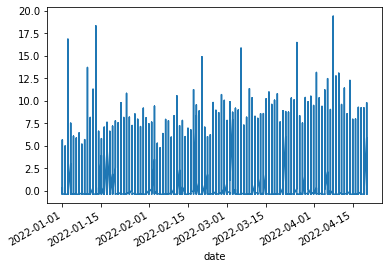

In [40]:
fig, ax = plt.subplots()
time_line.plot(legend=False, ax=ax)
plt.show()